<a href="https://colab.research.google.com/github/Srishti2703/Fake_News_Classifier/blob/main/Srishti%20Chandra_Project-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

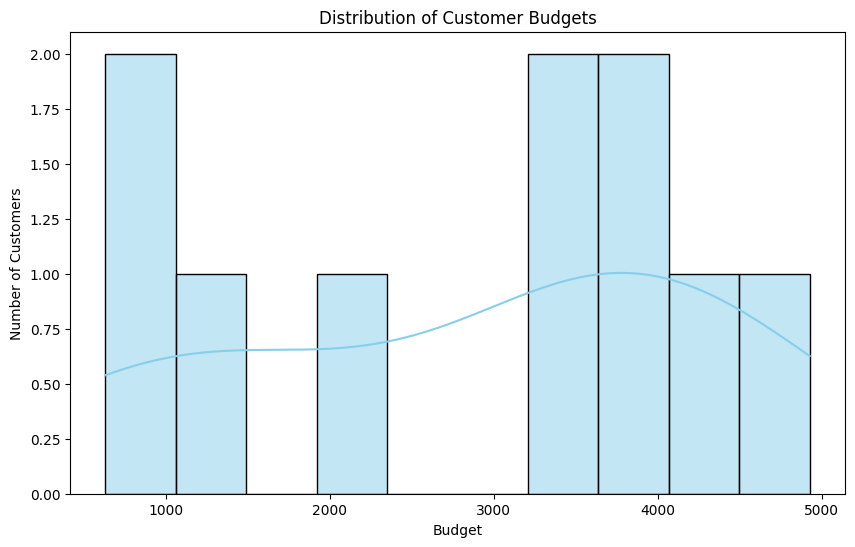

<ipython-input-1-63fc3de835f8>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Preferred_Activities', data=df_customers, palette='viridis')


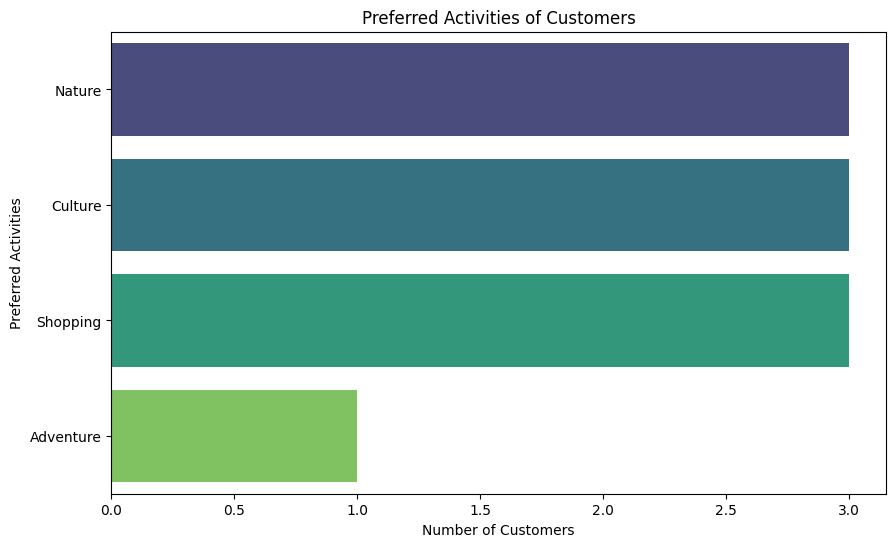

<ipython-input-1-63fc3de835f8>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Preferred_Destination_Type', data=df_customers, palette='coolwarm')


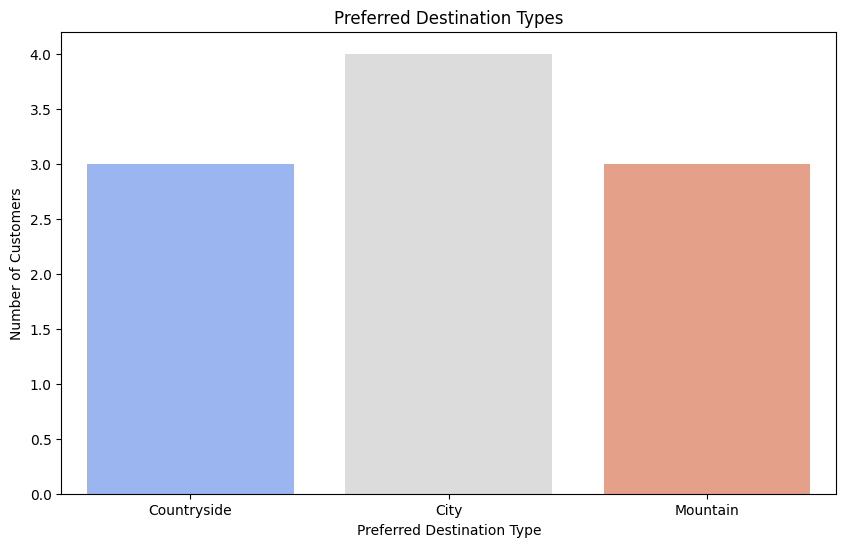

   CustomerID  Budget Preferred_Activities Preferred_Destination_Type  \
0           1    1360               Nature                Countryside   
1           2    4272              Culture                       City   
2           3    3592             Shopping                   Mountain   
3           4     966              Culture                   Mountain   
4           5    4926             Shopping                       City   
5           6    3944               Nature                   Mountain   
6           7    3671            Adventure                       City   
7           8    3419             Shopping                Countryside   
8           9     630              Culture                       City   
9          10    2185               Nature                Countryside   

  Recommended_Destination  Estimated_Cost  
0              Swiss Alps          4000.0  
1                New York          1050.0  
2                    None             NaN  
3                New

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection
np.random.seed(42)

# Sample data for 10 customers
data = {
    'CustomerID': range(1, 11),
    'Budget': np.random.randint(500, 5000, 10),
    'Preferred_Activities': np.random.choice(['Adventure', 'Culture', 'Relaxation', 'Shopping', 'Nature'], 10),
    'Preferred_Travel_Duration': np.random.choice(['3 Days', '5 Days', '7 Days', '10 Days'], 10),
    'Preferred_Destination_Type': np.random.choice(['Beach', 'Mountain', 'City', 'Countryside'], 10)
}

# Creating a DataFrame for customers
df_customers = pd.DataFrame(data)

# Sample data for destinations
destinations = {
    'DestinationID': range(1, 6),
    'Destination_Name': ['Bali', 'Swiss Alps', 'New York', 'Santorini', 'Kyoto'],
    'Activity_Type': ['Adventure', 'Nature', 'Culture', 'Relaxation', 'Culture'],
    'Destination_Type': ['Beach', 'Mountain', 'City', 'Beach', 'City'],
    'Cost_Per_Day': [250, 400, 350, 300, 280]
}

# Creating a DataFrame for destinations
df_destinations = pd.DataFrame(destinations)

# Exploratory Data Analysis (EDA)

# Distribution of customer budgets
plt.figure(figsize=(10, 6))
sns.histplot(df_customers['Budget'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Customer Budgets')
plt.xlabel('Budget')
plt.ylabel('Number of Customers')
plt.show()

# Preferred Activities
plt.figure(figsize=(10, 6))
sns.countplot(y='Preferred_Activities', data=df_customers, palette='viridis')
plt.title('Preferred Activities of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Preferred Activities')
plt.show()

# Preferred Destination Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred_Destination_Type', data=df_customers, palette='coolwarm')
plt.title('Preferred Destination Types')
plt.xlabel('Preferred Destination Type')
plt.ylabel('Number of Customers')
plt.show()

# Simple Recommendation Model

# Function to recommend a destination based on customer preferences
def recommend_destination(customer):
    # Filter destinations based on preferred activity and destination type
    filtered_destinations = df_destinations[
        (df_destinations['Activity_Type'] == customer['Preferred_Activities']) &
        (df_destinations['Destination_Type'] == customer['Preferred_Destination_Type'])
    ]

    # Check if any destination matches
    if not filtered_destinations.empty:
        # Check if the customer budget allows for the selected destination
        for _, dest in filtered_destinations.iterrows():
            total_cost = dest['Cost_Per_Day'] * int(customer['Preferred_Travel_Duration'].split()[0])
            if total_cost <= customer['Budget']:
                return dest['Destination_Name'], total_cost

    # If no match found within budget, recommend the closest option based on activity preference
    closest_match = df_destinations[
        (df_destinations['Activity_Type'] == customer['Preferred_Activities'])
    ]

    if not closest_match.empty:
        dest = closest_match.iloc[0]
        total_cost = dest['Cost_Per_Day'] * int(customer['Preferred_Travel_Duration'].split()[0])
        return dest['Destination_Name'], total_cost

    # If no close match found, return None
    return None, None

# Apply the recommendation function to each customer
df_customers['Recommended_Destination'], df_customers['Estimated_Cost'] = zip(
    *df_customers.apply(recommend_destination, axis=1)
)

# Displaying the updated customer dataframe with recommendations
print(df_customers[['CustomerID', 'Budget', 'Preferred_Activities', 'Preferred_Destination_Type',
                   'Recommended_Destination', 'Estimated_Cost']])

# Optimized Recommendation Model

# Function to recommend a destination with optimization
def optimized_recommendation(customer):
    """
    Recommends a travel destination based on customer preferences and budget.
    If no direct match is found, considers alternative destination types or reduces travel duration.

    Parameters:
    customer (pd.Series): A row from the customer DataFrame.

    Returns:
    str, float: Recommended destination name and estimated cost, or None if no match is found.
    """
    # Filter destinations by preferred activity and destination type
    filtered_destinations = df_destinations[
        (df_destinations['Activity_Type'] == customer['Preferred_Activities']) &
        (df_destinations['Destination_Type'] == customer['Preferred_Destination_Type'])
    ]

    # Check if any destination matches within budget
    for _, dest in filtered_destinations.iterrows():
        total_cost = dest['Cost_Per_Day'] * int(customer['Preferred_Travel_Duration'].split()[0])
        if total_cost <= customer['Budget']:
            return dest['Destination_Name'], total_cost

    # If no match found, try alternative destination types with the same activity
    alternative_destinations = df_destinations[
        (df_destinations['Activity_Type'] == customer['Preferred_Activities'])
    ]

    for _, dest in alternative_destinations.iterrows():
        total_cost = dest['Cost_Per_Day'] * int(customer['Preferred_Travel_Duration'].split()[0])
        if total_cost <= customer['Budget']:
            return dest['Destination_Name'], total_cost

    # If still no match, suggest reducing the travel duration to fit within the budget
    for _, dest in filtered_destinations.iterrows():
        adjusted_duration = customer['Budget'] // dest['Cost_Per_Day']
        if adjusted_duration >= 1:  # Ensure at least 1 day is affordable
            return f"{dest['Destination_Name']} (Reduced to {adjusted_duration} days)", dest['Cost_Per_Day'] * adjusted_duration

    # If no match found even after all optimizations
    return None, None

# Apply the optimized recommendation function to each customer
df_customers['Optimized_Recommended_Destination'], df_customers['Optimized_Estimated_Cost'] = zip(
    *df_customers.apply(optimized_recommendation, axis=1)
)

# Displaying the updated customer dataframe with optimized recommendations
print(df_customers[['CustomerID', 'Budget', 'Preferred_Activities', 'Preferred_Destination_Type',
                   'Optimized_Recommended_Destination', 'Optimized_Estimated_Cost']])